In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [77]:
iris=pd.read_csv('C:\\Users\hp\OneDrive\Desktop\DataScience\Codsoft -Internship\Iris Dataset.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [78]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [79]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [80]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [81]:
iris.shape

(150, 5)

In [82]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Data Preprocessing

In [84]:
#create a column withe int values for species columns
iris['iris_code'] = iris['species'].map({'Iris-setosa':0 ,'Iris-versicolor':1,'Iris-virginica':2}).astype(int)

In [85]:
ir0 = iris[iris.iris_code ==0] #-setosa
ir1 = iris[iris.iris_code ==1] #-versicolor
ir2 = iris[iris.iris_code ==2] #-Virgiinica

# Visulalization

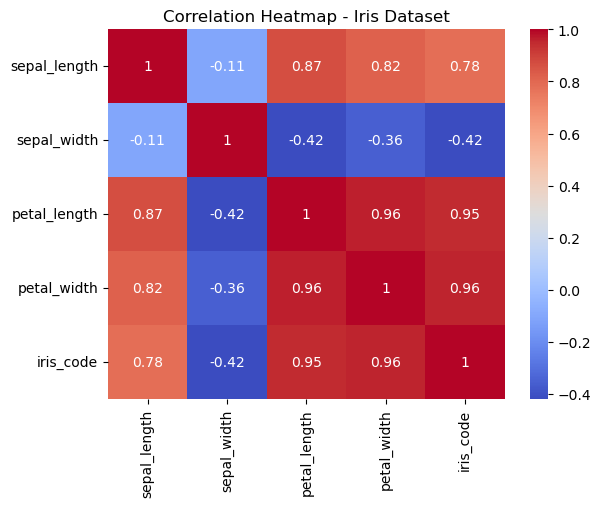

In [86]:
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Iris Dataset")
plt.show()

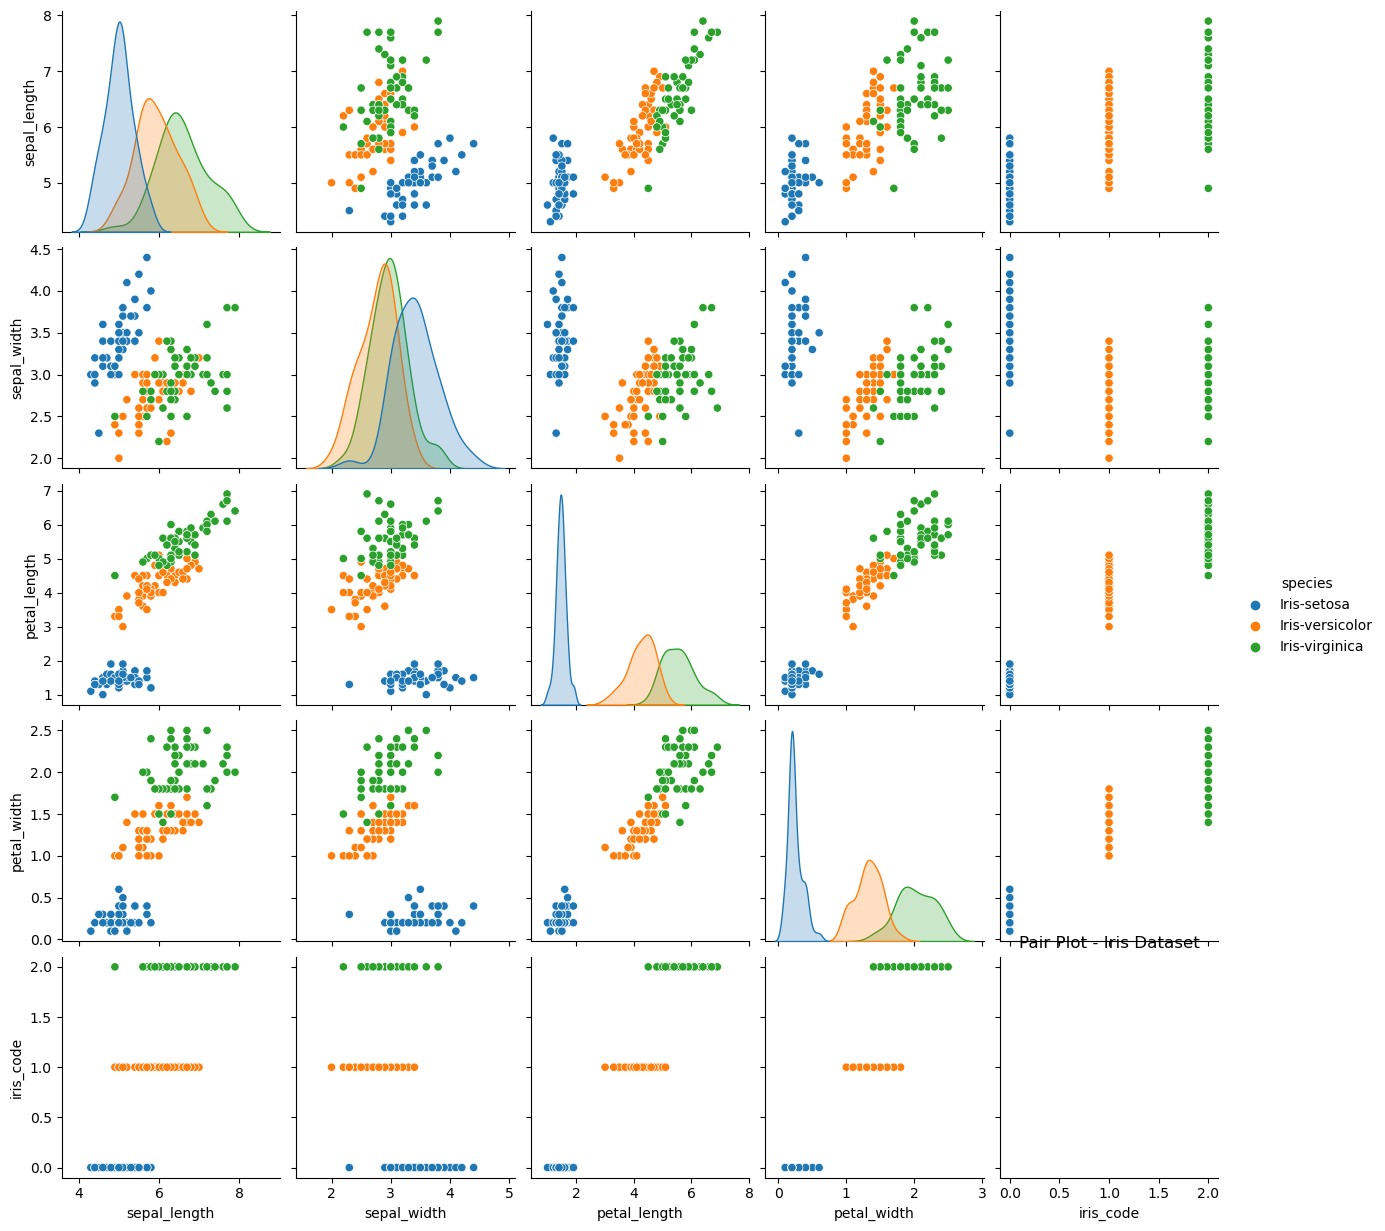

In [87]:
sns.pairplot(iris, hue="species")
plt.title("Pair Plot - Iris Dataset")
plt.show()

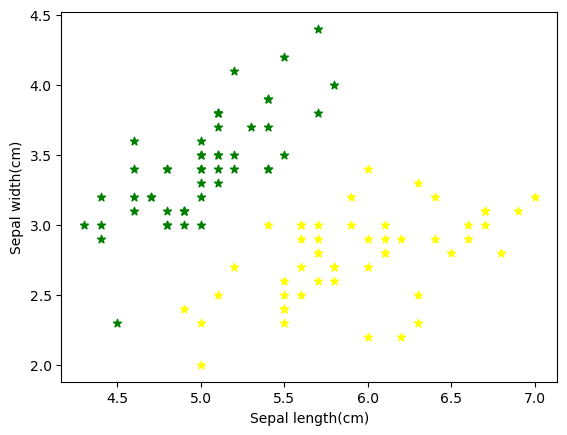

In [88]:
# scatter plot with sepal length and sepal width comparision
plt.xlabel('Sepal length(cm)')
plt.ylabel('Sepal width(cm)')
plt.scatter(ir0['sepal_length'],ir0['sepal_width'],color='green',marker='*')
plt.scatter(ir1['sepal_length'],ir1['sepal_width'],color='Yellow',marker='*')

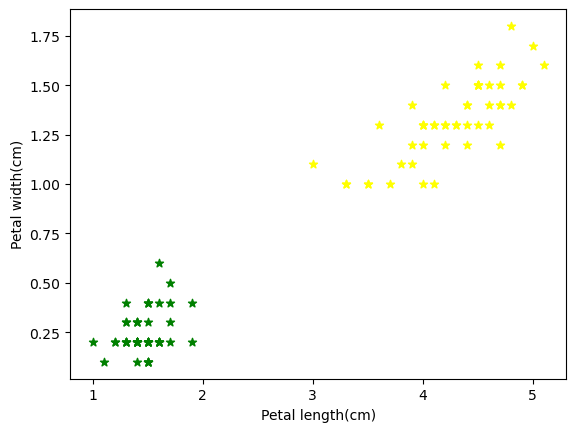

In [89]:
# comparision between Petal length and petal width
plt.xlabel('Petal length(cm)')
plt.ylabel('Petal width(cm)')
plt.scatter(ir0['petal_length'],ir0['petal_width'],color='Green',marker='*')
plt.scatter(ir1['petal_length'],ir1['petal_width'],color='Yellow',marker='*')

In [90]:
#drop columns for model 
x= iris.drop(['species','iris_code'],axis='columns')
y= iris.iris_code

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [92]:
model = SVC()

In [93]:
model.fit(x_train,y_train)

SVC()

In [94]:
model.score(x_test,y_test)

0.9666666666666667

In [97]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.90      0.95        10
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [98]:
new_data = np.array([[4, 2, 4, 0.2], [5, 4.8,3.8, 2.8], [6.3, 4.9, 7, 9.8]])
predicted_labels = model.predict(new_data)
print("Predicted labels for new data:")
print(predicted_labels)

Predicted labels for new data:
[1 1 2]
